In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from IPython import display
import json

In [3]:
def read_parameters(filename):
    with open(filename) as f:
        return json.loads(f.read())

In [4]:
#Load without import (So I won't need to restart the kernel all the time)
with open("molecule.py") as f: exec(f.read())
with open("simulation.py") as f: exec(f.read())
with open("multispecies_simulation.py") as f: exec(f.read())

In [5]:
fast = Simulation(read_parameters("./setups/presentation/parameters_fast_diffusion.json"))
fast.run()

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

In [6]:
med = Simulation(read_parameters("./setups/presentation/parameters_medium_diffusion.json"))
slow = Simulation(read_parameters("./setups/presentation/parameters_slow_diffusion.json"))
med.run()
slow.run()

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

In [7]:
fast.approximate_diffusion_ceofficient()

Approximation : 2.67186611602873
Value : 2.7
Ratio : 0.9895800429736036


2.67186611602873

Text(0, 0.5, 'Amount')

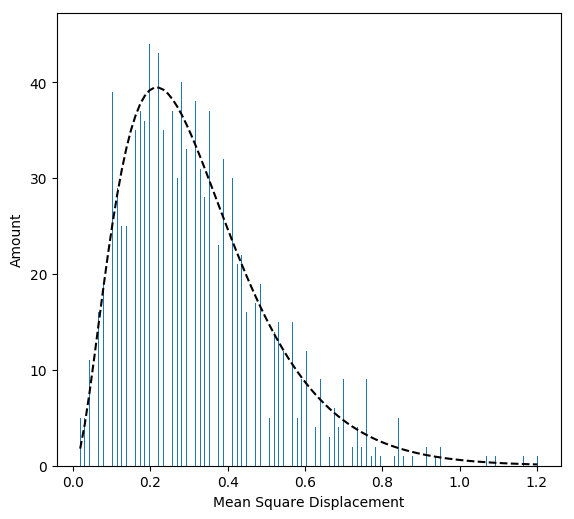

In [8]:
res = [_get_mean_square_displacement(i, 3) for i in fast.get_journies_by_length(4)]
[Y,X,*_] = np.histogram(res,100)
X = X[:-1]

number_of_tracks = np.sum(Y)
number_of_steps = 3
delta = np.mean(np.diff(X))

def distribution(X, D1):
    DSTAR = 2 * fast.step_time_in_seconds * D1
    return (number_of_tracks*delta)*1/(DSTAR**number_of_steps) * (1/(np.math.factorial(number_of_steps-1) * 2**number_of_steps)) * (X**(number_of_steps-1) * np.exp(-X/(2*DSTAR))) 



args, errors = optimize.curve_fit(distribution,
                    X, Y, p0=(25))
plt.bar(X, Y,.002)
plt.plot(X, distribution(X, *args),'--k')
plt.xlabel("Mean Square Displacement")
plt.ylabel("Amount")

(array([10., 27., 26., 32., 28., 23., 19., 18., 32., 27., 13., 23., 17.,
        17., 22., 14., 10., 13., 12.,  9.,  9., 13.,  8.,  5.,  3.,  2.,
         8.,  1.,  2.,  2.,  2.,  1.,  2.,  1.,  1.,  2.,  4.,  0.,  0.,
         0.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([4.19213629e-05, 2.25218311e-04, 4.08515259e-04, 5.91812208e-04,
        7.75109156e-04, 9.58406104e-04, 1.14170305e-03, 1.32500000e-03,
        1.50829695e-03, 1.69159390e-03, 1.87489085e-03, 2.05818779e-03,
        2.24148474e-03, 2.42478169e-03, 2.60807864e-03, 2.79137559e-03,
        2.97467254e-03, 3.15796948e-03, 3.34126643e-03, 3.52456338e-03,
        3.70786033e-03, 3.89115728e-03, 4.07445422e-03, 4.25775117e-03,
        4.44104812e-03, 4.62434507e-03, 4.80764202e-03, 4.99093897e-03,
        5.17423591e-03, 5.35753286e-03, 5.54082981e-03, 5.72412676e-03,
        5.90742371e-03, 6.09072066e-03, 6.27401760e-03, 6.45731455e-03,
        6.64061150e-03, 6.82390845e-03, 7.00720540e-03, 7.19050235e-

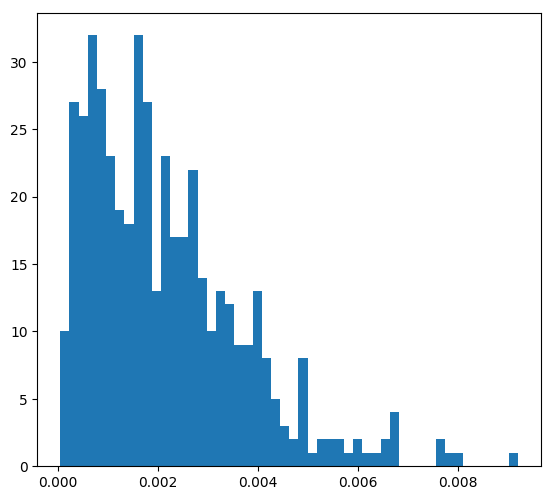

In [9]:
res = [_get_mean_square_displacement(i, 2) for i in slow.get_journies_by_length(3)]
plt.hist(res,50)

(array([ 6.,  7., 12., 16., 17., 14., 23., 26., 17., 12., 24., 13., 11.,
        11., 19., 17., 14.,  9., 13., 14., 10.,  7.,  5.,  9.,  4.,  4.,
         3.,  4.,  6.,  4.,  1.,  1.,  2.,  2.,  1.,  1.,  0.,  0.,  3.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.]),
 array([0.0029461 , 0.00511828, 0.00729046, 0.00946264, 0.01163482,
        0.013807  , 0.01597918, 0.01815136, 0.02032354, 0.02249572,
        0.0246679 , 0.02684008, 0.02901226, 0.03118445, 0.03335663,
        0.03552881, 0.03770099, 0.03987317, 0.04204535, 0.04421753,
        0.04638971, 0.04856189, 0.05073407, 0.05290625, 0.05507843,
        0.05725061, 0.05942279, 0.06159497, 0.06376715, 0.06593933,
        0.06811151, 0.07028369, 0.07245587, 0.07462805, 0.07680023,
        0.07897241, 0.08114459, 0.08331678, 0.08548896, 0.08766114,
        0.08983332, 0.0920055 , 0.09417768, 0.09634986, 0.09852204,
        0.10069422, 0.1028664 , 0.10503858, 0.10721076, 0.10938294,
        0.11155512]),
 <a list of 50

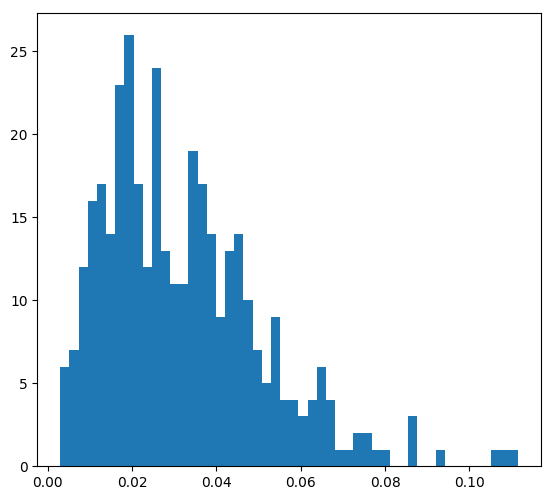

In [10]:
res = [_get_mean_square_displacement(i, 3) for i in med.get_journies_by_length(4)]
plt.hist(res,50)

[0.26641229 0.02471126 0.95656962]


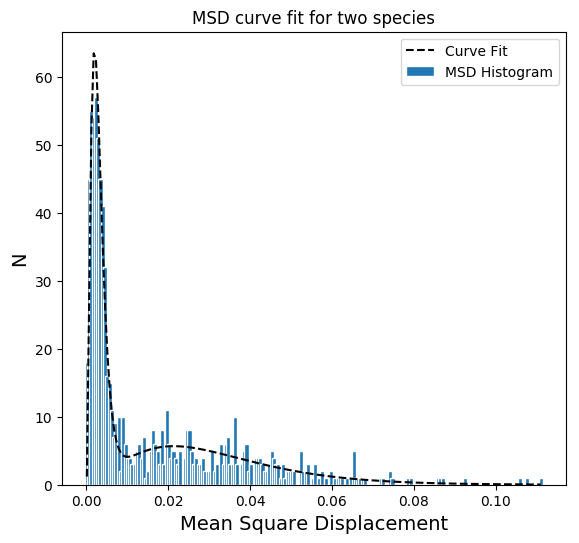

In [16]:
multiple_species1 = TwoSpeciesSimulation(slow, med)
args, [X, Y, aY] = multiple_species1.approxiamte_diffusion_coefficients(p0 = [.2,.02, .5])
plt.bar(X,Y, .001, edgecolor='white')
plt.plot(X,aY, 'k--')
plt.xlabel("Mean Square Displacement", fontsize = 14);
plt.ylabel("N", fontsize = 14)
plt.legend(["Curve Fit","MSD Histogram"])
plt.title("MSD curve fit for two species")
print(args)

[2.72192064 0.23791502 3.97585247]


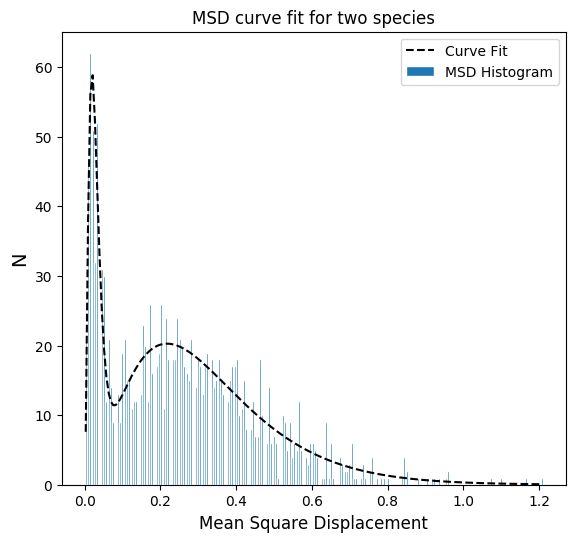

In [20]:
multiple_species2 = TwoSpeciesSimulation(fast, med)
args, [X, Y, aY] = multiple_species2.approxiamte_diffusion_coefficients(p0 = [2,.2, .5])
plt.bar(X,Y, .005, edgecolor='white')
plt.plot(X,aY, '--k')
plt.xlabel("Mean Square Displacement", fontsize = 12);
plt.ylabel("N", fontsize = 14)
plt.legend(["Curve Fit","MSD Histogram"])
plt.title("MSD curve fit for two species")
print(args)

In [93]:
video = Simulation(read_parameters("./setups/presentation/physical_simulation.json"))
video.run(verbose=False )
video.save_animation("/Users/yotamvaknin/Downloads/temp.tiff")

HBox(children=(IntProgress(value=0, max=99), HTML(value='')))

In [94]:
video = Simulation(read_parameters("./setups/presentation/physical_simulation.json"))
video.number_of_frames = 200
video.number_of_subframes_per_frame = 50
video.run(verbose=False )
video.save_animation("/Users/yotamvaknin/Downloads/temp2.tiff")

HBox(children=(IntProgress(value=0, max=199), HTML(value='')))

In [95]:
video = Simulation(read_parameters("./setups/presentation/physical_simulation.json"))
video.number_of_frames = 400
video.number_of_subframes_per_frame = 25
video.run(verbose=False )
video.save_animation("/Users/yotamvaknin/Downloads/temp3.tiff")

HBox(children=(IntProgress(value=0, max=399), HTML(value='')))

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

HBox(children=(IntProgress(value=0, max=499), HTML(value='')))

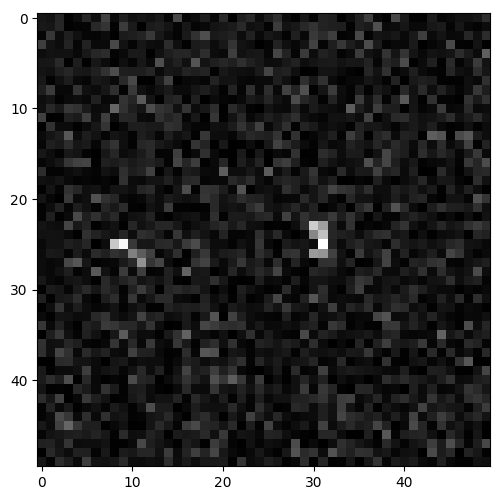

498/|/100%|| 498/499 [00:53<00:00,  9.28it/s]

In [99]:
video = Simulation(read_parameters("./setups/presentation/physical_simulation_for_video.json"))
video.run()
video.plot_animation()

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=499), HTML(value='')))

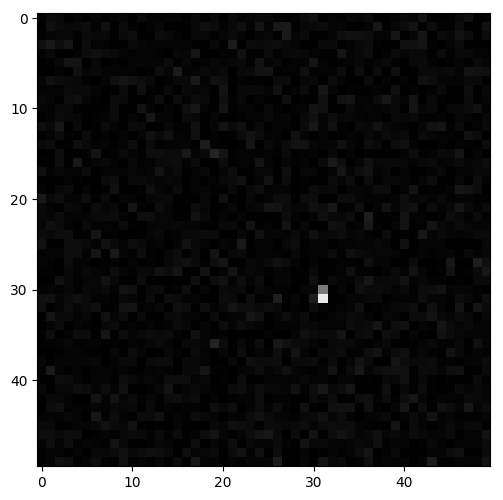

498/|/100%|| 498/499 [00:58<00:00,  8.57it/s]

In [100]:
video = Simulation(read_parameters("./setups/presentation/physical_simulation_for_video2.json"))
video.run()
video.plot_animation()